In [1]:
#-------------------------------------------------------------#
#                    Market Mix Modeling                      #
#-------------------------------------------------------------#
#Sales Data 
#To understand how much each marketing input contributes to sales, and how much to spend on each marketing input.

#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Import data using pandas
df = pd.read_csv("data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
#remove extra 'Unnamed' column
df_clean = df.drop('Unnamed: 0',axis=1)
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
#Data discription
df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [47]:
#Check NULL values in data frame
df_clean.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

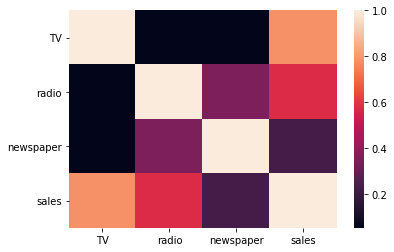

In [32]:
#Correlation b/w the data columns
corr = df_clean.corr()
sns.heatmap(corr)

In [3]:
#dividing data into features and label
X = df_clean.drop(['sales'], axis=1)
y = df_clean['sales']

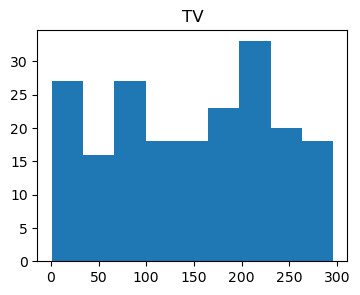

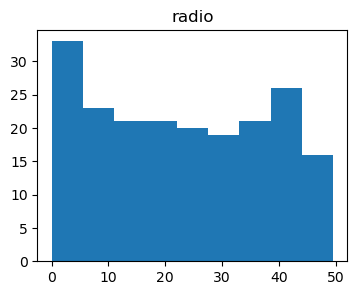

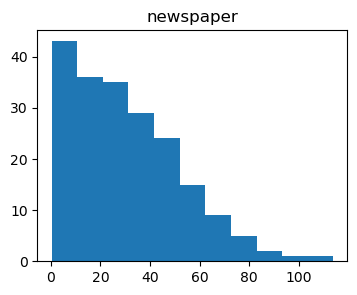

In [9]:
#Data distribution of all the features
for x in X:
    plt.figure(figsize=(4,3))
    plt.hist(X[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

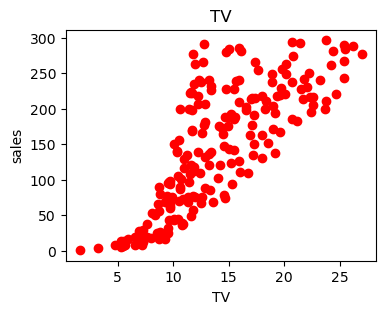

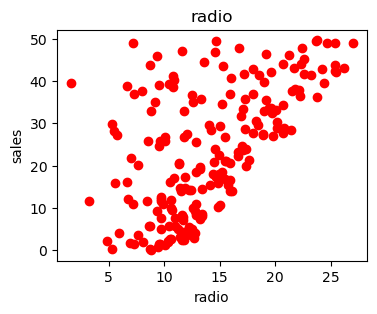

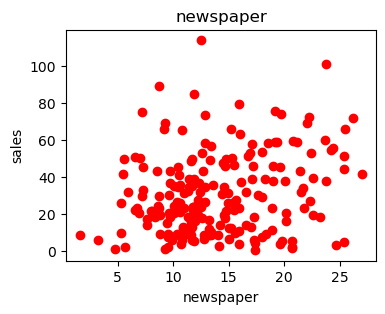

In [11]:
#Relationship b/w features and label
for x in X:
    plt.figure(figsize=(4,3))
    plt.plot(y, X[x], 'ro')  # arguments are passed to np.histogram
    plt.title(x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

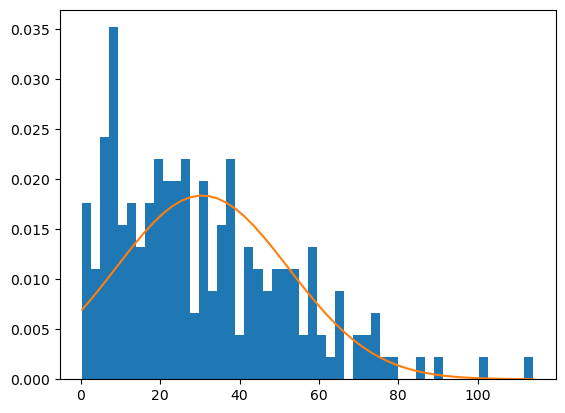

In [14]:
#-------------------------------------------------------------#
#                       Normality Test                        #
#-------------------------------------------------------------#
import numpy as np
from scipy.stats import norm

# density=True: Normalizes the histogram so that the area under the histogram sums to 1. This was previously done using normed=1, which is now deprecated.
n, bins, patches = plt.hist(df_clean['newspaper'], 50, density=True)
mu = np.mean(df_clean['newspaper'])
sigma = np.std(df_clean['newspaper'])
plt.plot(bins, norm.pdf(bins, mu, sigma))

In [37]:
# Newspaper is right skewed


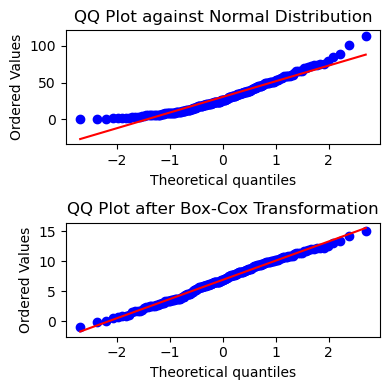

In [20]:
from scipy import stats

#--------------------------------------------------------------#
#                           Box-Cox                            #
#--------------------------------------------------------------#
#Remove data skrewness                     
#Newspaper is skrew towards left

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Original QQ plot against a normal distribution
stats.probplot(df_clean['newspaper'], dist="norm", plot=ax1)
ax1.set_title('QQ Plot against Normal Distribution')

# Applying Box-Cox transformation
df_clean['newspaper_transformed'], _ = stats.boxcox(df_clean['newspaper'])

# QQ plot after Box-Cox transformation
stats.probplot(df_clean['newspaper_transformed'], dist="norm", plot=ax2)
ax2.set_title('QQ Plot after Box-Cox Transformation')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


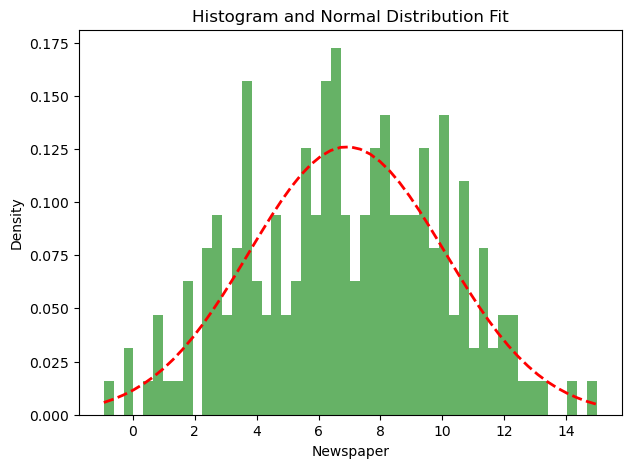

In [26]:
plt.figure(figsize=(7,5))
n, bins, patches = plt.hist(df_clean['newspaper_transformed'], bins=50, density=True, alpha=0.6, color='g')

# Calculate the mean and standard deviation
mu = np.mean(df_clean['newspaper_transformed'])
sigma = np.std(df_clean['newspaper_transformed'])

# Plot the normal distribution curve
plt.plot(bins, norm.pdf(bins, mu, sigma), 'r--', linewidth=2)

plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Newspaper')
plt.ylabel('Density')

plt.show()


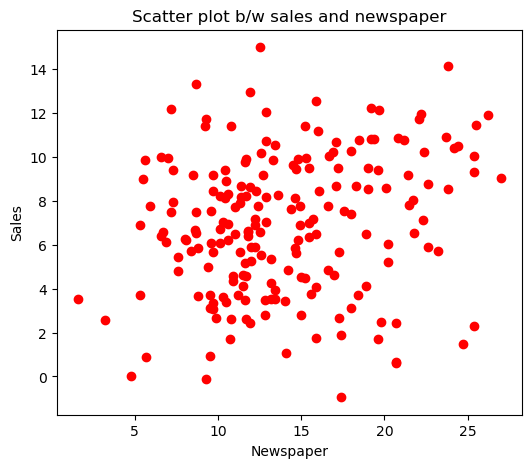

In [32]:
#Change in the relationship of the newspaper with sales

plt.figure(figsize=(6,5))
plt.plot(df_clean['sales'], df_clean['newspaper_transformed'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [33]:
df_clean.to_csv(r'cleanDataNew.csv')

In [16]:
#No relationship b/w sales and newspaper

In [46]:
import statsmodels.api as sm

# Define the target variable and features
X1 = df_clean[['TV', 'radio', 'newspaper']]
X2 = df_clean[['TV', 'radio']]
X3 = df_clean[['TV']]
y = df_clean['sales']

# Add a constant (intercept) to each model
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

# Fit the models
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()

# Print the summaries
print("Model 1 Summary (TV, radio, newspaper):")
print(model1.summary())

print("\nModel 2 Summary (TV, radio):")
print(model2.summary())

print("\nModel 3 Summary (TV):")
print(model3.summary())

Model 1 Summary (TV, radio, newspaper):
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.58e-96
Time:                        16:23:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [ ]:
#------------------------------------------------------------------------#
#             Selecting the best model based on the results              #
#------------------------------------------------------------------------#

#Comparison of all 3 models
#------------------------------------------------------------------
#      Results           |  Model 1   |   Model 2   |   Model 3   |
#------------------------------------------------------------------
#  R-squared:            |  0.897    |   0.897      |   0.612     |
#  Adj. R-squared:       |  0.896    |   0.896      |   0.610     |
#  AIC                   |  780.4    |   778.4      |   1042.     |
#  BIC                   |  793.6    |   788.3      |   1049.     |
#------------------------------------------------------------------


#-------------------------------------------------------------------------#
#                                AIC & BIC                                #
#     Akaike’s Information Criterion & Bayesian information criterion     #
#-------------------------------------------------------------------------#

#They are used to compare a number of models and the model with lowest values of AIC and BIC is 
#considered to be the best (however AIC and BIC are accompanied often by other tests of fit, 
#e.g. RMSEA, CFI, TLI etc. and the decision which model is the best is not based on AIC and BIC only

#As from the above result it is clear that model 2 has the lowest AIC and BIC values.

In [ ]:
#----------------------------------------------------------------#
#             Selecting Best features for the model              #
#----------------------------------------------------------------#
# using pvalues and hypothesis

#Parameter results of model 1
#==============================================================================
#                 coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#Intercept      2.8894      0.361      7.995      0.000       2.177       3.602
#TV             0.0457      0.001     32.810      0.000       0.043       0.048
#radio          0.1876      0.008     22.190      0.000       0.171       0.204
#newspaper      0.0060      0.040      0.152      0.879      -0.072       0.084
#==============================================================================

#-------------------------------------------#
#                 P-value                   #
#-------------------------------------------#
# If the p-value of a coefficient is less than the chosen significance level, such as 0.05, the relationship 
# between the predictor and the response is statistically significant

# pvalue for newspaper is 0.879 higher then 0.05 which means we are failed to reject null hypothesis.



#-----------------------------------------------------#
#               F-value or F-statistic                #
#-----------------------------------------------------#
#F-statistic is the test statistic for the analysis of variance (ANOVA) approach to test the significance 
#of the model or the components in the model.

#If the p-value is small (less than your alpha level), you can accept the null hypothesis. 
#Only then should you consider the f-value. If you fail to reject the null, discard the f-value result.



#------------------------------------------#
#             Null Hypothesis              #
#------------------------------------------#
#A null hypothesis is a statement, in which there is no relationship between two variables. 


In [36]:
#The standard deviation of an estimate is called the standard error. 
#The standard error of the coefficient measures how precisely the model estimates the coefficient's unknown value. 
#The standard error of the coefficient is always positive.

print('Standard errors: ', model2.bse)

Standard errors:  const    0.29449
TV       0.00139
radio    0.00804
dtype: float64


In [39]:
#Model predictions on the current data.
predicted = model2.predict()
df1 = pd.DataFrame({'Actual': y, 'Predicted': predicted})  
df1.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


C:\Users\a\AppData\Local\Temp\ipykernel_12684\2478896948.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')
C:\Users\a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


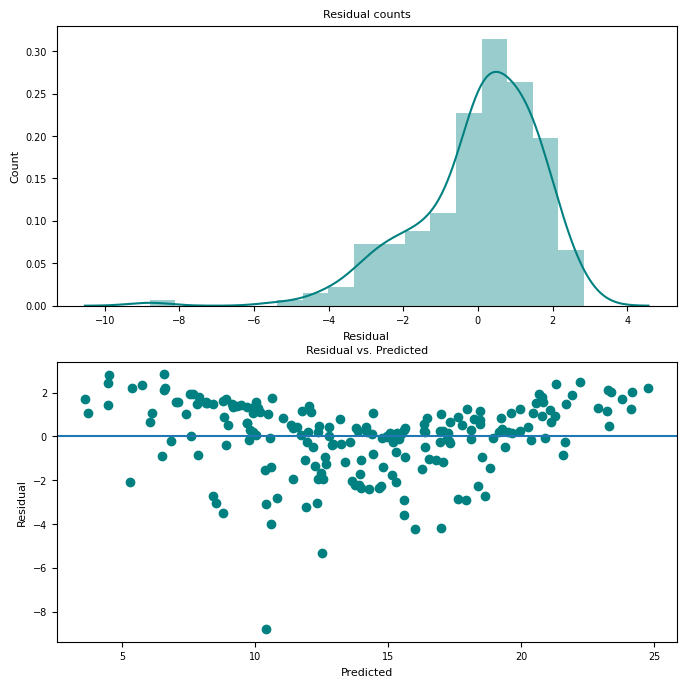

In [40]:
#Residual Distribution 

residual = y - predicted

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title('Residual counts',fontsize=8)
plt.xlabel('Residual',fontsize=8)
plt.ylabel('Count',fontsize=8)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlabel('Predicted',fontsize=8)
plt.ylabel('Residual',fontsize=8)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=8)

plt.show()



In [41]:
rmse = np.sqrt(mean_squared_error(y, predicted))
print('RMSE:', rmse)

RMSE: 1.668703059366193


C:\Users\a\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\a\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\a\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent w

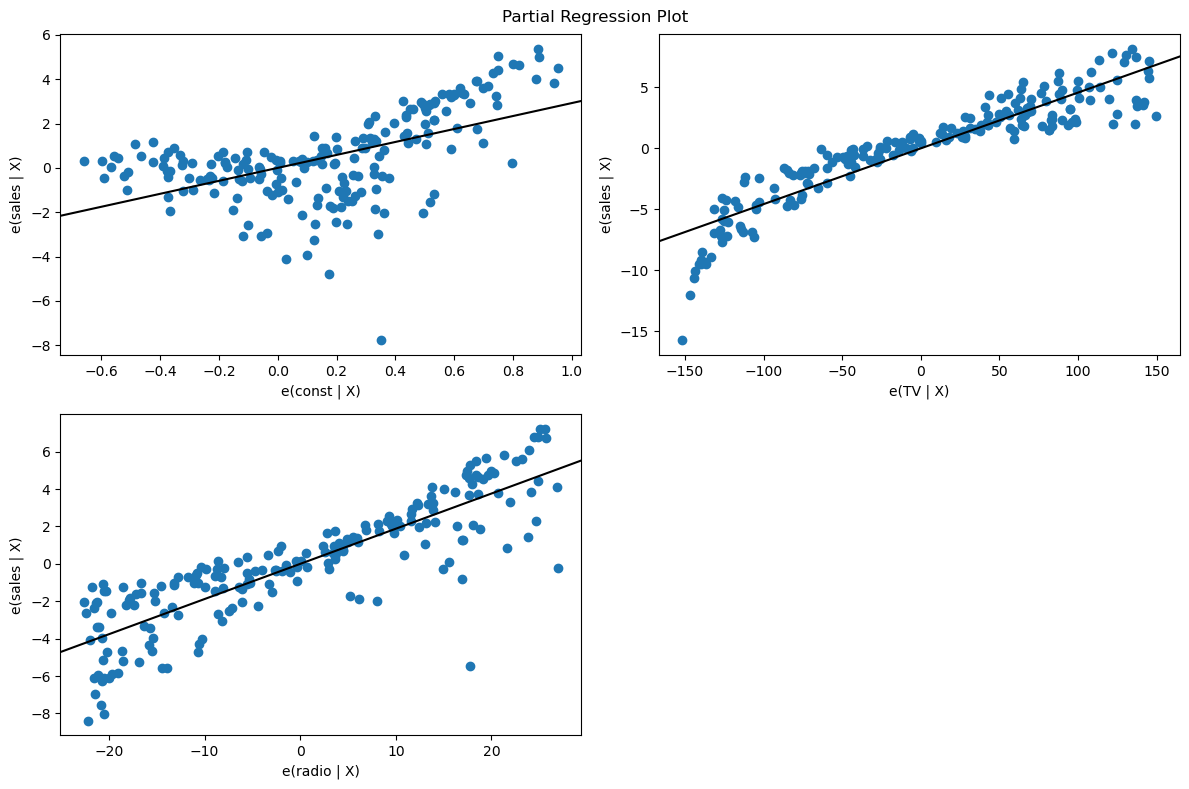

In [42]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)